In [1]:
import numpy as np
mu, sigma = 0, 0.1
list10 = np.random.normal(mu,sigma,10)
list100 = np.random.normal(mu,sigma,100)
list1000 = np.random.normal(mu,sigma,1000)

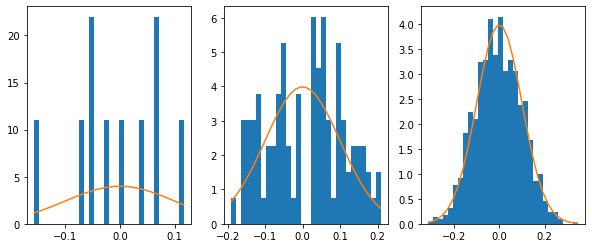

In [2]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

count, bins, ignored = ax1.hist(list10, 30, density=True)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

count, bins, ignored = ax2.hist(list100, 30, density=True)
ax2.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

count, bins, ignored = ax3.hist(list1000, 30, density=True)
ax3.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ))

plt.show()

In [3]:
counters = np.empty(100)
for iter in range(100):
    randList5 = list(np.random.randint(0,2,5))
    counter = 0
    while 0 in randList5:
        for i in range(len(randList5)):
            if np.random.uniform(0,1) <= 0.1:
                randList5[i] ^= 1
                counter += 1
    randList5
    counters[iter] = counter
print(counters)


[ 19. 297.  28.  87.  84.  77.  22.   7.  83. 163.  20.  82.  14.  49.
  97.  16.   8.  77.  40.  39. 107.  97.  22.  75.   9.  16.  26. 195.
 119.  87.  10.  65.  76.   7.  16.  44.  13.   6.  47.  33.   5. 102.
   0.  35.  96.  28.  24.  64.  36.  15.  69.  23.  53.  23.   1. 258.
  25.   0.  10.  49.  85.  17.   0.  29.  64.  52.  13.   2.  59.  55.
   7. 114.  84.   1.  37.  67.  41.  73.  91. 152.  27.  11.  97.  19.
  24.  41.  14.   2. 139. 160.  69.  58.  45.  37.  13.  63.  26.   9.
  90.   1.]


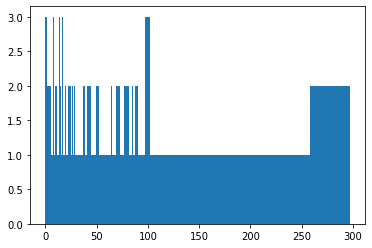

In [4]:
plt.hist(counters, bins = np.unique(counters))
plt.show()


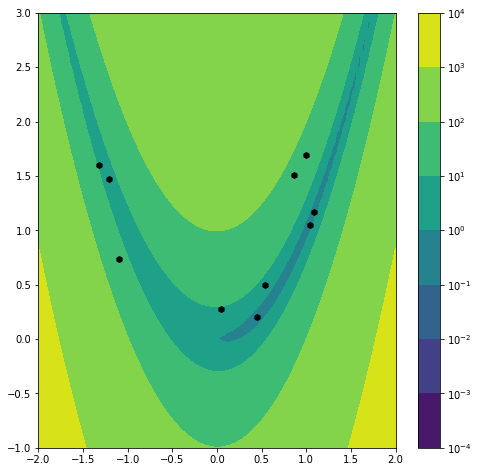

In [16]:
from pylab import meshgrid
from matplotlib import colors
import time
from IPython.display import clear_output
np.random.seed(10)

a, b = 1, 100
def func(x,y):
 return (a-x)**2+b*(y-x**2)**2

fig,ax = plt.subplots(1,1,figsize=(8,8))
x = np.linspace(-2.0,2.0,80)
y = np.linspace(-1.0,3.0,80)
X,Y = meshgrid(x, y)
Z = func(X, Y) 

cset = ax.contourf(X, Y, Z, norm=colors.LogNorm())
plt.colorbar(cset)

# Init. population w/ 20 rnd. individuals
popX = np.random.uniform(low=-2.0, high=2.0, size=20)
popY = np.random.uniform(low=-1.0, high=3.0, size=20)
funcVals = np.array(func(popX, popY))

v = 10 # Number of visualized individuals
idx = np.argpartition(funcVals, v)
filter_indices = idx[:v]
bestPopX = popX[filter_indices] 
bestPopY = popY[filter_indices]
#ax.scatter(popX,popY,marker='*', color='black')
ax.scatter(bestPopX, bestPopY, marker='h', color='black')

#time.sleep(2)
clear_output()